# Introduction to Theano


In [ ]:
Tomasz Golan
MLVF Meeting, 03.16.2016

# Linear Regression

# Notation

* Features: 

$$x = (x_1, ..., x_n)$$

* Training example:

$$(x^{(i)}, y^{(i)})$$

* Training set:

$$\left\{(x^{(i)}, y^{(i)}); i = 1, ..., N\right\}$$

# Notation

* Weights:

$$w = (w_0, w_1, ..., w_n)$$

* For convenience:

$$x_0 = 1$$

* Hypothesis:

$$h (x) = w_0 + w_1x_1 + ... + w_nx_n = \sum\limits_{i = 0}^n w_i x_i = w^T x$$

# Learning

* Learning means finding $w$
* Lets define cost function as:

$$f(w) = \frac{1}{2}\sum\limits_{i=1}^N\left(h (x^{(i)}) - y^{(i)}\right)^2$$

* Minimum can be find using gradient descent method:

$$w_j = w_j - \alpha\frac{\partial f(w)}{\partial w_j} = w_j + \alpha\sum\limits_{i=1}^N\left(y^{(i)} - h (x^{(i)})\right)x_j$$

* Where $\alpha$ is learning rate

# Generate Samples

In [2]:
%matplotlib inline

### IMPORTS ###

import numpy
import matplotlib.pyplot as plt

rng = numpy.random # random number generator

### SETTINGS ###

N = 100 # number of samples

a = 0.50 # slope
b = 0.50 # y-intercept
s = 0.25 # sigma

### GENERATE SAMPLES ###

X = (10.0 * rng.sample(N))                               # features
Y = [(a * X[i] + b) + rng.normal(0,s) for i in range(N)] # targets

# Plot samples

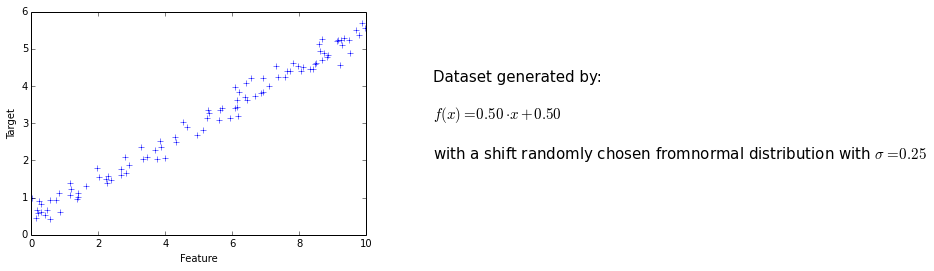

In [3]:
### PLOT SAMPLES ###

plt.xlabel('Feature')
plt.ylabel('Target')
plt.plot(X, Y, '+')
plt.text(12, 2, 'Dataset generated by:\n\n'
                '$f(x) = %.2f \cdot x + %.2f$\n\n'
                'with a shift randomly chosen from'
                'normal distribution with $\sigma = %.2f$' 
                % (a, b, s), fontsize = 15)
plt.show()

# Theano

In [11]:
import theano
import theano.tensor as T

nTrainSteps = 1000 # number of training steps
alpha = 0.01 / N # learning rate

### SYMBOLIC VARIABLES ###

x = T.vector('x') # feature vector
y = T.vector('y') # target vector

w = theano.shared(rng.randn(), name = 'w') # random weights
b = theano.shared(rng.randn(), name = 'b') # bias term (w_0)

### EXPRESSION GRAPH ###

prediction = T.dot(x, w) + b          # hyphothesis
cost = T.sum(T.pow(prediction - y,2)) # cost function
gw, gb = T.grad(cost, [w,b])          # gradients

### COMPILE ###

# update weights to minimize cost
train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((w, w - alpha * gw),
                                   (b, b - alpha * gb)))

# Find weights

In [12]:
### TRAIN ###

costs = [] # value of cost function in each training step

for i in range(nTrainSteps): costs.append(train(X, Y))
    
print "f(x) = %.2f * x + %.2f" % (w.get_value(), b.get_value())

f(x) = 0.50 * x + 0.47


# Plot results

In [13]:
def plotMe(): # just to fit on a slide
    fig, plots = plt.subplots(1,2) # create a 1x2 grid of plots
    # double horizontal size of figure
    fig.set_size_inches((2, 1) * fig.get_size_inches()) 

    # first plot
    plots[0].set_title('Reconstructed line: y = %.2f x + %.2f'
                       % (w.get_value(), b.get_value()))
    plots[0].set_xlabel('Feature')
    plots[0].set_ylabel('Target')

    u = numpy.arange(0, 10, 0.1)
    plots[0].plot(u, w.get_value() * u + b.get_value(), 'r', X, Y, '+')

    # second plot
    plots[1].set_title('Training progress')
    plots[1].set_xlabel('Training step')
    plots[1].set_ylabel('Cost function')

    plt.ylim([1, 100])
    plots[1].set_yscale('log')

    u = numpy.arange(0, nTrainSteps, 1)
    plots[1].plot(u, costs, 'g,')

    plt.show()

# Plot results

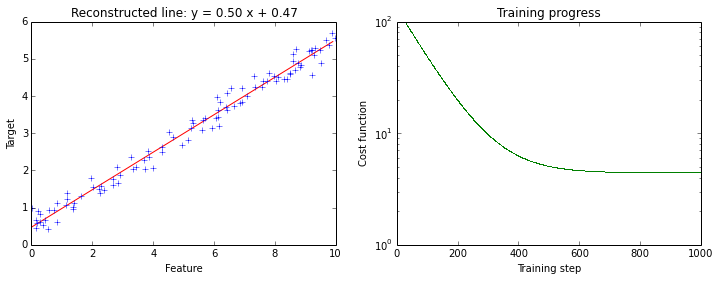

In [14]:
plotMe()

# Logistic Regression

# Classification - linear vs logistic

<img src="images/linlog.png" width = "100%">

# Notation

* Logistic function: 

$$g(z) = \frac{1}{1 + e^{-z}}$$

* Hypothesis: 

$$h (x) = g(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$$

# Notation

* Probability of 1:

$$P (y = 1 | x, w) = h(x)$$

* Probability of 0:

$$P (y = 0 | x, w) = 1 - h(x)$$

* Probability:

$$p (y | x, w) = (h(x))^y\cdot(1 - h(x))^{1 - y}$$

# Likelihood

* Likelihood: 

$$L(w) = p(y | X,w) = \prod\limits_{i = 1}^N p(y^{(i)} | x^{(i)}, w) = \prod\limits_{i=1}^N (h(x^{(i)}))^{y^{(i)}}\cdot(1 - h(x^{(i)}))^{1 - y^{(i)}}$$

* Log-likelihood:

$$l(w) = \log L(w) = \sum\limits_{i=1}^Ny^{(i)}\log h(x^{(i)}) + (1 - y^{(i)})\log (1-h(x^{(i)}))$$

# Learning

* Gradient of logistic function:

$$\frac{dg(z)}{dz} = g(z)(1 - g(z))$$

* Gradient of log-likehood:

$$\frac{\partial l(w)}{\partial w_j} = (y - h(x))\cdot x_j$$

# Learning

* Cost function:

$$f(w) = -l(w)$$

* Learning step (minimize $f(w)$):

$$w_j = w_j - \alpha\frac{\partial f(w)}{\partial w_j}$$

* Note, it is perceptron, when:

$$g(z) = 1 \text{ for } z \geq 1 \text{ or } 0 \text{ for } z < 1$$

# Generate samples

In [15]:
%matplotlib inline

### IMPORTS ###

import numpy
import matplotlib.pyplot as plt

rng = numpy.random # random number generator

### SETTINGS ###

N = 1000 # number of samples
n = 4    # number of features

### FUNCTIONS ###

def isInCircle (point): # returns 1 (0) if point is (not) in circle
                        # (radius chosen so #inside ~ #outside)
  return int (point[0] * point[0] + point[1] * point[1] < 2 / 3.14)

### GENERATE SAMPLES ###

randomPoints = (2.0 * rng.sample ((N, 2)) - 1) # [-1,1]x[-1,1]

X = [[p[0], p[1], p[0]*p[0],p[1]*p[1]] for p in randomPoints]
Y = [isInCircle(x) for x in randomPoints] # 1/0 -> inside/outside circle


# Plot samples

In [16]:
def plotMe(): # just to fit on a slide
    # separate points inside and outside circle
    inside, outside = [], []

    for i in range(N):
        if Y[i]: inside.append(randomPoints[i])
        else: outside.append(randomPoints[i])

    # axis settings        
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])

    # plot samples

    plt.scatter(*zip(*inside), marker = '+', color = 'r')
    plt.scatter(*zip(*outside), marker = 'x', color = 'b')

    plt.text(1.5, -1, 'Dataset:\n\n'
                      'Points inside / outside circle'
                      '$x^2 + y^2 = 2 / 3.14$\n\n'
                      'No. of points inside  = %d\n\n'
                      'No. of points outside = %d\n\n'
                      % (len(inside), len(outside)), fontsize = 15)

    plt.show()

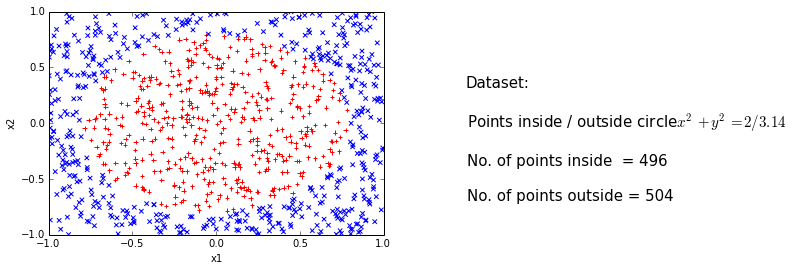

In [17]:
plotMe()

# Theano

In [18]:
import theano
import theano.tensor as T

nTrainSteps = 1000 # number of training steps
alpha = 0.01 # learning rate

### SYMBOLIC VARIABLES ###

x = T.matrix('x') # feature vector
y = T.vector('y') # target vector

w = theano.shared(rng.randn(n), name = 'w') # n weights initialized randomly
b = theano.shared(rng.randn(), name = 'b')  # bias term (w_0)

### EXPRESSION GRAPH ###

h = 1 / (1 + T.exp(-T.dot(x, w) - b))          # hypothesis
prediction = h > 0.5                           # prediction threshold
xent = - y * T.log(h) - (1 - y) * T.log(1 - h) # cross-entropy loss function
cost = xent.sum()                              # cost function
gw, gb = T.grad(cost, [w,b])                   # gradients

### COMPILE ###

train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((w, w - alpha * gw),
                                   (b, b - alpha * gb)))

# Find weights

In [19]:
### TRAIN ###

costs = [] # value of cost function in each training step

for i in range(nTrainSteps): costs.append(train(X, Y))
    
print "w =", w.get_value()
print "b =", b.get_value()

w = [ -0.15778745   0.19991422 -25.09642442 -25.05667537]
b = 15.9232617172


# Plot results

In [20]:
from mpl_toolkits.mplot3d import axes3d

def plotMe():
    # separate points inside and outside circle
    inside, outside = [], []

    for i in range(N):
        if Y[i]: inside.append(randomPoints[i])
        else: outside.append(randomPoints[i])
            
    fig = plt.figure()
    fig.set_size_inches((2, 2) * fig.get_size_inches())

    # hypothesis / probability

    x1 = numpy.arange(-1, 1, 0.01)
    x2 = numpy.arange(-1, 1, 0.01)
    x1, x2 = numpy.meshgrid(x1, x2)

    a = w.get_value() # calculated weights

    h = 1 / (1 + numpy.exp(-a[0] * x1 - a[1] * x2 - a[2] * x1 * x1 - a[3] * x2 * x2 - b.get_value())) # h(x)

    ax = fig.add_subplot(221, projection='3d')

    ax.set_title('Probability')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('h')

    inside  = [[i[0], i[1], 0.5] for i in inside]  # add z-dimension to training points
    outside = [[o[0], o[1], 0.5] for o in outside] # z = probability threshold

    ax.plot_wireframe(x1, x2, h, rstride = 10, cstride = 10, color = 'g') # plot h(x)

    ax.scatter(*zip(*outside), marker = 'x', color = 'b') # plot training points outside circle
    ax.scatter(*zip(*inside),  marker = '+', color = 'r') # plot training points inside circle

    # training progress

    ax = fig.add_subplot(222)

    ax.set_title('Training progress')
    ax.set_xlabel('Training step')
    ax.set_ylabel('Cost function')

    steps = []
    steps.extend(range(0,nTrainSteps))

    plt.ylim([0, 200])
    ax.plot(steps, costs, 'g,')

    plt.show()

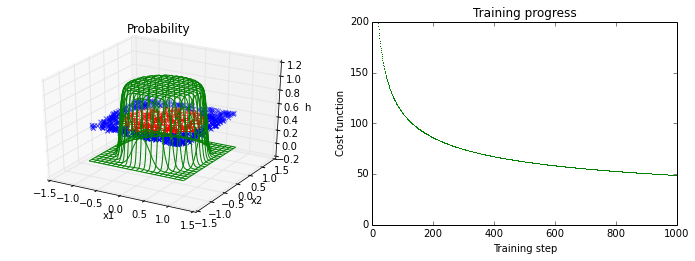

In [22]:
plotMe()

# Test

In [25]:
### COMPILE THEANO FUNTION ###

predict = theano.function(inputs = [x], outputs = prediction)

### SETTINGS ###

score = 0
nTest = 1000 # number of testing samples

### TESTING SAMPLES ###

randomPoints = (2.0 * rng.sample ((nTest, 2)) - 1) # random points [-1,1]x[-1,1]

testSample = [[p[0], p[1], p[0] * p[0], p[1] * p[1]] for p in randomPoints]

### PREDICT AND CALCULATE SCORE ###

result = predict (testSample) # predict inside / outside for testing sample

for i in range(nTest):
    if result[i] == isInCircle(randomPoints[i]): score += 1
        
print "Score = ", 1.0 * score / nTest

Score =  0.996


# First neural network - AND gate

| x | y | x AND y|
|:-:|:-:|:------:|
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

# Neural Network Scratch

<center><img src="images/and.png" width = "50%"></center>

* Hypothesis = logistic function: $h(x) = \frac{1}{1 + e^{-w^Tx}}$
* Intuition: $w_0 < 0$, $w_0 + w_1 < 0$, $w_0 + w_2 < 0$, $w_0 + w_1 + w_2 > 0$

# Check intuition

In [34]:
from math import exp

### BY HAND WEIGHTS ###

w0 = -300
w1 = 200
w2 = 200

### LOGISTIC FUNCTION ###

def h(x1, x2):
    return 1 / (1 + exp(-w0 - w1 * x1 - w2 * x2))

### TRAINING SET ###

X = [[0,0], [0,1], [1,0], [1,1]] # input
Y = [0, 0, 0, 1]                 # expected output

### TEST ###

for x in X: print '%d AND %d = %f' % (x[0], x[1], h(x[0], x[1]))

0 AND 0 = 0.000000
0 AND 1 = 0.000000
1 AND 0 = 0.000000
1 AND 1 = 1.000000


# Prepare Theano

In [35]:
import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy

rng = numpy.random # random number generator

### SETTINGS ###

nTrainSteps = 1000 # number of training steps
alpha = 1.0 # learning rate

### SYMBOLIC VARIABLES ###

x = T.vector('x') # input
y = T.scalar('y') # expected value

w = theano.shared(rng.randn(2), name = 'w') # 2 weights initialized randomly
b = theano.shared(rng.randn(), name = 'b')  # bias term (w_0)

### EXPRESSION GRAPH ###

layer1 = nnet.sigmoid(T.dot(x,w) + b) # input layer
layer2 = T.sum(layer1)                # output layer
cost = (layer2 - y)**2                # cost function
gw, gb = T.grad(cost, [w,b])          # gradients

# Learn

In [36]:
### TRAIN ###

train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = ((w, w - alpha * gw),
                                   (b, b - alpha * gb)))

costs   = [] # value of cost function in each training step
weights = [] # value of weights in each training step
bias    = [] # value of bias term in each training step

for i in range (nTrainSteps):
    # train net using each element from X
    for j in range(4): c = train(X[j], Y[j])
    # save progress to plot them later
    costs.append(c)
    weights.append(w.get_value())
    bias.append(b.get_value())

# Plot weights

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

def plotMe():

    ### PLOT RESULTS ###

    fig, plots = plt.subplots(2,2) # create a 2x2 grid of plots
    fig.set_size_inches((2, 2) * fig.get_size_inches()) # double size of figure

    steps = [] # just ints from 0 to nTrainStep
    steps.extend(range(0,nTrainSteps))

    ### PLOT COST FUNCTION ###

    plots[0][0].set_xlabel('Training step')
    plots[0][0].set_ylabel('Cost function')

    plots[0][0].set_ylim([0.0001, 0.1])
    plots[0][0].set_yscale('log')
    plots[0][0].plot(steps, costs, 'g,')

    ### PLOT BIAS TERM ###

    plots[0][1].set_xlabel('Training step')
    plots[0][1].set_ylabel('w0')
    plots[0][1].plot(steps, bias, 'r,')

    ### PLOT WEIGHTS ###

    w1 = [w[0] for w in weights]
    w2 = [w[1] for w in weights]

    plots[1][0].set_xlabel('Training step')
    plots[1][0].set_ylabel('w1')
    plots[1][0].plot(steps, w1, 'r,')

    plots[1][1].set_xlabel('Training step')
    plots[1][1].set_ylabel('w2')
    plots[1][1].plot(steps, w2, 'r,')

    plt.show()

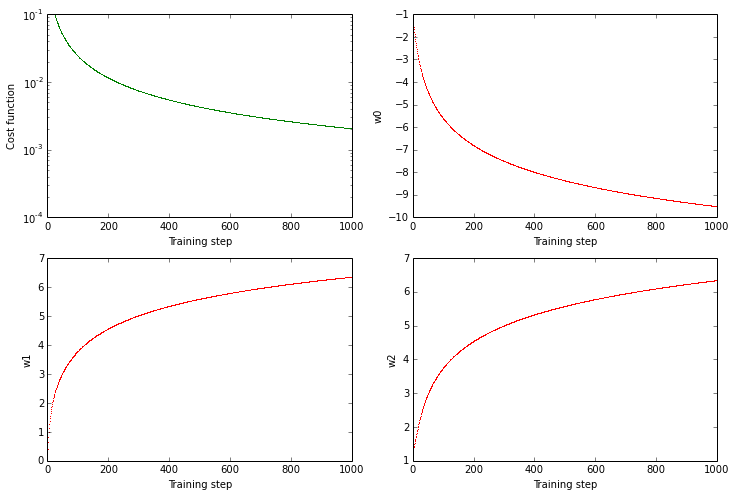

In [38]:
plotMe()

# Test

In [39]:
### TEST ###        

predict = theano.function(inputs=[x], outputs=layer2)

for x in X: print '%d AND %d = %f' % (x[0], x[1], predict(x))

0 AND 0 = 0.000071
0 AND 1 = 0.037623
1 AND 0 = 0.037746
1 AND 1 = 0.955776


# First non-linear NN - XOR gate

| x | y | x XOR y|
|:-:|:-:|:------:|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

# AND & OR vs XOR

# Neural Network Scratch

<center><img src="images/xor.png" width = "50%"></center>

* x XOR y = (x AND NOT y) OR (y AND NOT x)

# Imports and stuff 

In [40]:
### IMPORTS ###

import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy

rng = numpy.random # random number generator

### SETTINGS ###

nTrainSteps = 10000 # number of training steps

alpha = 0.1 # learning rate

### TRAINING SET ###

X = [[0,0], [0,1], [1,0], [1,1]] # input
Y = [0, 1, 1, 0]                 # expected output

# Variables and layers

In [44]:
### SYMBOLIC VARIABLES ###

x = T.vector('x') # input
y = T.scalar('y') # expected value

# first layer's weights (including bias)
w1 = theano.shared(rng.rand(3,2), name = 'w') 
# second layer's weights (including bias)
w2 = theano.shared(rng.rand(3), name = 'b')   

### EXPRESSION GRAPH ###

def layer (x, w):             # inputs, weights
    b = numpy.array([1])      # bias term
    xb = T.concatenate([x,b]) # input x with bias added
    return nnet.sigmoid(T.dot(w.T, xb))

hiddenLayer = layer (x, w1)                 # hidden layer
outputLayer = T.sum(layer(hiddenLayer, w2)) # output layer
cost = (outputLayer - y)**2                 # cost function

def gradient (c, w):                 # cost function, weights
    return w - alpha * T.grad (c, w) # update weights

# Compile, train and run

In [45]:
### COMPILE ###

train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = [(w1, gradient(cost, w1)),
                                   (w2, gradient(cost, w2))])

predict = theano.function(inputs=[x], outputs=outputLayer)

### TRAIN ###

for i in range (nTrainSteps):
    # train net using each element from X
    for j in range(4): c = train(X[j], Y[j])

### TEST ###        
        
for x in X: print '%d XOR %d = %f' % (x[0], x[1], predict(x))

0 XOR 0 = 0.033310
0 XOR 1 = 0.970494
1 XOR 0 = 0.970508
1 XOR 1 = 0.031032


In [4]:
from IPython.display import display, HTML
s = """

<style>

.rendered_html h1 {
    color: #015C9C;
    text-align: center;
}

</style>
"""
display(HTML(s))